In [ ]:
# Cargamos los paquetes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure

In [ ]:
# Cargamos los datos

data = pd.read_excel("input_data.xlsx")
comunas = list(data['Comuna'])
latitud = list(data['latitud'])
longitud = list(data['longitud'])
peso = list(data['peso'])
peso_2 = list(data['peso_2'])
peso_3 = list(data['peso_3'])

latitud_fija = list(data['latitud_fija'])[0]
longitud_fija = list(data['longitud_fija'])[0]

In [ ]:
comunas = np.array(comunas)

In [ ]:
# Fijamos la matrix X

X = []

for i in range(len(latitud)):
  X.append([latitud[i], longitud[i]])

X = np.array(X)

In [ ]:
def k_means_weighted_fixed_center(X, N_max, x_fijo, y_fijo, peso, semilla):

  min_x = min(X[:, 0])
  max_x = max(X[:, 0])

  min_y = min(X[:, 1])
  max_y = max(X[:, 1])

  # Altiro seteamos en 3 centroides
  np.random.seed(semilla)

  c_1 = np.array([x_fijo, y_fijo])
  c_2 = np.array([np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)])
  c_3 = np.array([np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)])

  labels = []

  # Calculamos a que cluster pertenece cada punto

  for i in X:
    distancias = [np.linalg.norm(i-c_1), np.linalg.norm(i-c_2), np.linalg.norm(i-c_3)]
    labels.append(distancias.index(min(distancias))+1)
  
  #Ahora seteamos los nuevos centroides 2 y 3
  new_c2 = np.array([0, 0])
  pond_2 = 0

  new_c3 = np.array([0, 0])
  pond_3 = 0

  for i in range(len(labels)):
    if labels[i] == 2:
      new_c2 = new_c2 + peso[i]*X[i]
      pond_2 = pond_2 + peso[i]

    elif labels[i] == 3:
      new_c3 = new_c3 + peso[i]*X[i]
      pond_3 = pond_3 + peso[i]
  
  new_c2 = new_c2/pond_2
  new_c3 = new_c3/pond_3

  c_2 = new_c2
  c_3 = new_c3

  # Ahora comenzamos las iteraciones

  for n in range(N_max):

    new_labels = []

    for i in X:
      distancias = [np.linalg.norm(i-c_1), np.linalg.norm(i-c_2), np.linalg.norm(i-c_3)]
      new_labels.append(distancias.index(min(distancias))+1)

    if new_labels == labels:
      return [labels, c_1, c_2, c_3]
    
    else:

      #Ahora seteamos los nuevos centroides 2 y 3
      new_c2 = np.array([0, 0])
      pond_2 = 0

      new_c3 = np.array([0, 0])
      pond_3 = 0

      for i in range(len(labels)):
        if labels[i] == 2:
          new_c2 = new_c2 + peso[i]*X[i]
          pond_2 = pond_2 + peso[i]

        elif labels[i] == 3:
          new_c3 = new_c3 + peso[i]*X[i]
          pond_3 = pond_3 + peso[i]
  
      new_c2 = new_c2/pond_2
      new_c3 = new_c3/pond_3

      c_2 = new_c2
      c_3 = new_c3


  return [labels, c_1, c_2, c_3]

$ \huge{1. \ K-means \ \ \ ventas \ \ \  absolutas} $

In [ ]:
N_max = 300
semilla = 0
labels, c_1, c_2, c_3 = k_means_weighted_fixed_center(X, N_max, latitud_fija, longitud_fija, peso, semilla)

labels = np.array(labels)

In [ ]:
x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

for i in X[labels==1]:
  x_1.append(i[0])
  y_1.append(i[1])

for j in X[labels==2]:
  x_2.append(j[0])
  y_2.append(j[1])

for k in X[labels==3]:
  x_3.append(k[0])
  y_3.append(k[1])

In [ ]:
pesos_1 = []
pesos_2 = []
pesos_3 = []

for i in range(len(labels)):
  if labels[i] == 1:
    pesos_1.append(peso[i])
  elif labels[i] == 2:
    pesos_2.append(peso[i])
  else:
    pesos_3.append(peso[i])

In [ ]:
c_x = [c_1[0], c_2[0], c_3[0]]
c_y = [c_1[1], c_2[1], c_3[1]]

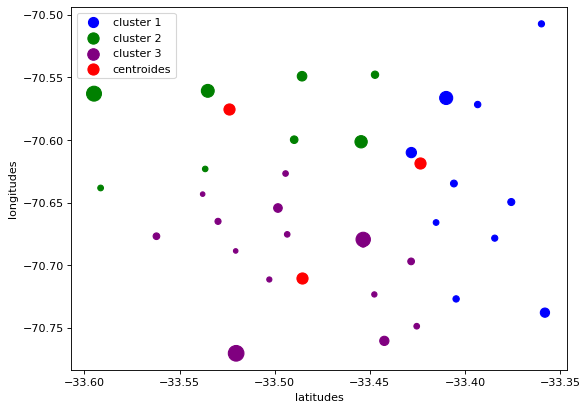

In [ ]:
figure(figsize=(8, 6), dpi=80)

redim = 100

plt.scatter(x_1, y_1, s = np.array(pesos_1)/redim, color= "blue", label = "cluster 1")
plt.scatter(x_2, y_2, s = np.array(pesos_2)/redim, color= "green", label = "cluster 2")
plt.scatter(x_3, y_3, s = np.array(pesos_3)/redim, color= "purple", label = "cluster 3")

plt.scatter(c_x, c_y, s = 100, color= "red", label = "centroides")

plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.legend()

plt.show()

In [ ]:
# Comunas cluster 1

list(comunas[labels==1])

['Las Condes',
 'Providencia',
 'Quilicura',
 'Huechuraba',
 'Recoleta',
 'Vitacura',
 'Renca',
 'Lo Barnechea',
 'Conchalí',
 'Independencia']

In [ ]:
# Comunas cluster 2

list(comunas[labels==2])

['Puente Alto',
 'La Florida',
 'Ñuñoa',
 'Peñalolén',
 'Macul',
 'La Reina',
 'La Pintana',
 'La Granja']

In [ ]:
# Comunas cluster 3

list(comunas[labels==3])

['Maipú',
 'Santiago (Centro)',
 'Pudahuel',
 'San Miguel',
 'Estación Central',
 'Quinta Normal',
 'El Bosque',
 'La Cisterna',
 'Cerro Navia',
 'San Joaquín',
 'Pedro Aguirre Cerda',
 'Lo Prado',
 'Cerrillos',
 'Lo Espejo',
 'San Ramón']

In [ ]:
# Clusters 

print(c_x)
print(c_y)

[-33.423579, -33.524103676389664, -33.48539815163878]
[-70.618379, -70.57514145683967, -70.70986500357924]


$ \huge{2. \ K-means \ \ \ ventas \ \ \  por \ \ \ superficie} $

In [ ]:
N_max = 300
semilla = 0
labels, c_1, c_2, c_3 = k_means_weighted_fixed_center(X, N_max, latitud_fija, longitud_fija, peso_2, semilla)

labels = np.array(labels)

In [ ]:
x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

for i in X[labels==1]:
  x_1.append(i[0])
  y_1.append(i[1])

for j in X[labels==2]:
  x_2.append(j[0])
  y_2.append(j[1])

for k in X[labels==3]:
  x_3.append(k[0])
  y_3.append(k[1])

In [ ]:
pesos_1 = []
pesos_2 = []
pesos_3 = []

for i in range(len(labels)):
  if labels[i] == 1:
    pesos_1.append(peso[i])
  elif labels[i] == 2:
    pesos_2.append(peso[i])
  else:
    pesos_3.append(peso[i])

In [ ]:
c_x = [c_1[0], c_2[0], c_3[0]]
c_y = [c_1[1], c_2[1], c_3[1]]

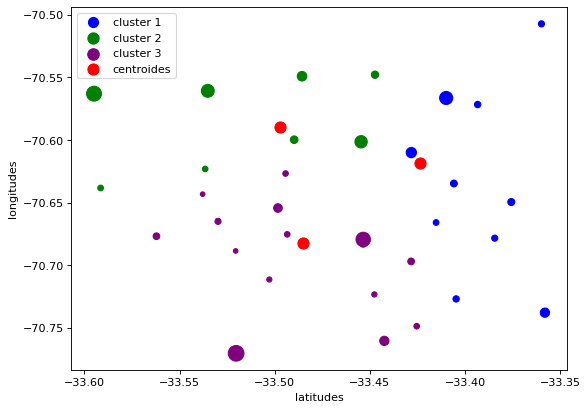

In [ ]:
figure(figsize=(8, 6), dpi=80)

redim = 100

plt.scatter(x_1, y_1, s = np.array(pesos_1)/redim, color= "blue", label = "cluster 1")
plt.scatter(x_2, y_2, s = np.array(pesos_2)/redim, color= "green", label = "cluster 2")
plt.scatter(x_3, y_3, s = np.array(pesos_3)/redim, color= "purple", label = "cluster 3")

plt.scatter(c_x, c_y, s = 100, color= "red", label = "centroides")

plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.legend()

plt.show()

In [ ]:
# Comunas cluster 1

list(comunas[labels==1])

['Las Condes',
 'Providencia',
 'Quilicura',
 'Huechuraba',
 'Recoleta',
 'Vitacura',
 'Renca',
 'Lo Barnechea',
 'Conchalí',
 'Independencia']

In [ ]:
# Comunas cluster 2

list(comunas[labels==2])

['Puente Alto',
 'La Florida',
 'Ñuñoa',
 'Peñalolén',
 'Macul',
 'La Reina',
 'La Pintana',
 'La Granja']

In [ ]:
# Comunas cluster 3

list(comunas[labels==3])

['Maipú',
 'Santiago (Centro)',
 'Pudahuel',
 'San Miguel',
 'Estación Central',
 'Quinta Normal',
 'El Bosque',
 'La Cisterna',
 'Cerro Navia',
 'San Joaquín',
 'Pedro Aguirre Cerda',
 'Lo Prado',
 'Cerrillos',
 'Lo Espejo',
 'San Ramón']

In [ ]:
# Clusters 

print(c_x)
print(c_y)

[-33.423579, -33.497377585832204, -33.484870030939994]
[-70.618379, -70.58983733413517, -70.6826051412388]


$ \huge{3. \ K-means \ \ \ ventas \ \ \  por \ \ \ habitantes} $

In [ ]:
N_max = 300
semilla = 0
labels, c_1, c_2, c_3 = k_means_weighted_fixed_center(X, N_max, latitud_fija, longitud_fija, peso_3, semilla)

labels = np.array(labels)

In [ ]:
x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

for i in X[labels==1]:
  x_1.append(i[0])
  y_1.append(i[1])

for j in X[labels==2]:
  x_2.append(j[0])
  y_2.append(j[1])

for k in X[labels==3]:
  x_3.append(k[0])
  y_3.append(k[1])

In [ ]:
pesos_1 = []
pesos_2 = []
pesos_3 = []

for i in range(len(labels)):
  if labels[i] == 1:
    pesos_1.append(peso[i])
  elif labels[i] == 2:
    pesos_2.append(peso[i])
  else:
    pesos_3.append(peso[i])

In [ ]:
c_x = [c_1[0], c_2[0], c_3[0]]
c_y = [c_1[1], c_2[1], c_3[1]]

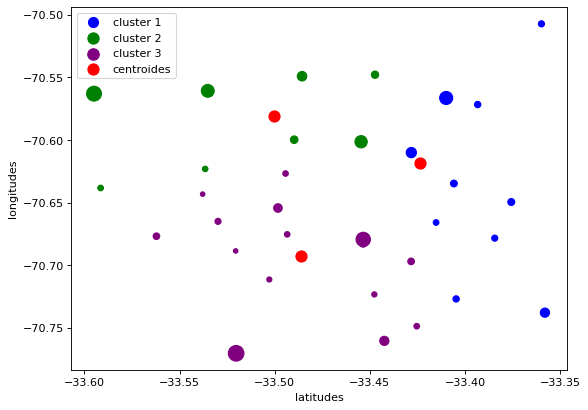

In [ ]:
figure(figsize=(8, 6), dpi=80)

redim = 100

plt.scatter(x_1, y_1, s = np.array(pesos_1)/redim, color= "blue", label = "cluster 1")
plt.scatter(x_2, y_2, s = np.array(pesos_2)/redim, color= "green", label = "cluster 2")
plt.scatter(x_3, y_3, s = np.array(pesos_3)/redim, color= "purple", label = "cluster 3")

plt.scatter(c_x, c_y, s = 100, color= "red", label = "centroides")

plt.xlabel('latitudes')
plt.ylabel('longitudes')
plt.legend()

plt.show()

In [ ]:
# Comunas cluster 1

list(comunas[labels==1])

['Las Condes',
 'Providencia',
 'Quilicura',
 'Huechuraba',
 'Recoleta',
 'Vitacura',
 'Renca',
 'Lo Barnechea',
 'Conchalí',
 'Independencia']

In [ ]:
# Comunas cluster 2

list(comunas[labels==2])

['Puente Alto',
 'La Florida',
 'Ñuñoa',
 'Peñalolén',
 'Macul',
 'La Reina',
 'La Pintana',
 'La Granja']

In [ ]:
# Comunas cluster 3

list(comunas[labels==3])

['Maipú',
 'Santiago (Centro)',
 'Pudahuel',
 'San Miguel',
 'Estación Central',
 'Quinta Normal',
 'El Bosque',
 'La Cisterna',
 'Cerro Navia',
 'San Joaquín',
 'Pedro Aguirre Cerda',
 'Lo Prado',
 'Cerrillos',
 'Lo Espejo',
 'San Ramón']

In [ ]:
# Clusters 

print(c_x)
print(c_y)

[-33.423579, -33.50016224024025, -33.48620058290321]
[-70.618379, -70.58092806175688, -70.69268141782545]
